#Study results
Here we look at the study results recieved from the university's Study Information System. The data consists of students that were on the fall semester of 2020 registered to the course Intro to Speciality.

In [2]:
#setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
study_results = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/inf2020/data/SISdata.xlsx', sheet_name = 'Tulemused')

In [6]:
study_results.columns

Index(['ISIKUKOOD', 'SEMESTER', 'AINEKOOD', 'AINE NIMETUS', 'TULEMUSE_KP',
       'HINDE_NIMETUS_EK', 'EAP_ARV'],
      dtype='object')

In [7]:
set(study_results['SEMESTER'])

{'2020/21 K', '2020/21 S'}

##The study results
This data consists of seven columns.
1. The first is the national ID that we can use to merge the dataframe to other instruments used in this study and to get the age and gender of the students.
2. The name of the semester when the grade was received. This includes two semesters 2020 fall semester (the very first semester for most students) and 2021 spring semester.
3. Course code for every course the student was registered during the two semesters. Each course has their unique code and they always follow a pattern of `four letters dot two numbers dot three numbers`. A course code has the institute name encoded into it. For example: codes starting with LTAT are courses from the institute of computer science.
4. Course name in Estonian
5. Date of the grade. Usually the date of the (final) exam in the course. Format dd/mm/yyyy
6. Name of the grade in Estonian. For discriminative courses it varies from 'A - suurepärane' to 'F - puudulik'. For non-discriminative courses it is either 'arvestatud' or 'mittearvestatud'. If a student was not present in the course and did no course related activities throughout the semester the grade is 'mitteilmunud' (not present).
7. Number of ECTS for the course. Does not depend on the semester nor the grade. The number of ECTS is determined by the course code.

In [46]:
set(study_results['HINDE_NIMETUS_EK'])

{'A - suurepärane',
 'B - väga hea',
 'C - hea',
 'D - rahuldav',
 'E - kasin',
 'F - puudulik',
 'arvestatud',
 'mittearvestatud',
 'mitteilmunud'}

In [9]:
grade_replacer = {'A - suurepärane': 5,
                  'B - väga hea': 4,
                  'C - hea': 3,
                  'D - rahuldav': 2,
                  'E - kasin': 1,
                  'F - puudulik': 0,
                  'arvestatud': 6,
                  'mittearvestatud': -6,
                  'mitteilmunud': 0}
#'not present' as 0, source: https://ut.ee/et/sisu/keskmine-hinne

In [10]:
#self_eff0 = self_eff.replace({'eff1':self_efficacy_replacer, 'eff2':self_efficacy_replacer, 'eff3':self_efficacy_replacer, 'eff4':self_efficacy_replacer, 'eff5':self_efficacy_replacer, 'eff6':self_efficacy_replacer})
#df['D'] = df['U'].map(d)
study_results['grade_no'] = study_results['HINDE_NIMETUS_EK'].map(grade_replacer)

In [11]:
fall_results = pd.DataFrame(study_results[study_results['SEMESTER'] == '2020/21 S'])

In [12]:
len(set(fall_results['AINE NIMETUS']))

35

Even though the students were collectively registered on 35 courses during the first semester only five of them are part of the official curricula and compulsory for the first semester. These five are, according to the study plan:
1. Sissejuhatus erialasse / Introduction to Speciality
2. Programmeerimine / Computer Programming (Python)
3. Kõrgem matemaatika I / Calculus I
4. Matemaatiline maailmapilt / Transition to Advanced Mathematics 
5. Arvuti arhitektuur ja riistvara I / Computer Architecture and Hardware I

In [13]:
#compulsory courses for first semester according to 
#the study plan https://cs.ut.ee/sites/default/files/2022-02/infbak2020_2021.pdf
fall_compulsory = ['Sissejuhatus erialasse',
                   'Programmeerimine', 
                   'Kõrgem matemaatika I',
                   'Matemaatiline maailmapilt',
                   'Arvuti arhitektuur ja riistvara I'
                   ]

In [14]:
comp_fall = fall_results[fall_results['AINE NIMETUS'].isin(fall_compulsory)]

In [15]:
#write to file to doublecheck
comp_fall.to_csv('comp_fall.csv')

In [16]:
#the students can take their exam twice if the first result is below 1. therefore, we need to aggregate to max grade
comp_fall_final = comp_fall.groupby(
   ['ISIKUKOOD', 'AINE NIMETUS']
).agg(
    {
         'grade_no':max
    }
)

In [17]:
comp_fall_final = pd.DataFrame(comp_fall_final)

In [21]:
#fix multi-index situation
comp_fall_final = comp_fall_final.reset_index()

##Distribution of fall semester grades

Using the grades from fall semester from courses that are compulsory for first-year-students we get the distributions.

All of the courses in the compulsory set have differentiated grades. 

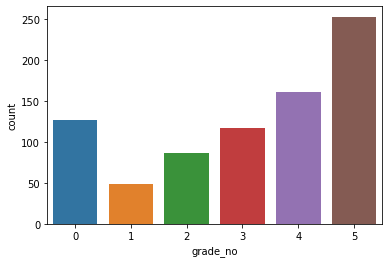

In [22]:
sns.countplot(x = comp_fall_final['grade_no'], data = comp_fall_final)

In [ ]:
sns.countplot(x = comp_fall['grade_no'], data = comp_fall)

In [39]:
#to see all the courses one-by-one we create dataframes for each course
prog_grades = comp_fall_final[comp_fall_final['AINE NIMETUS']=='Programmeerimine']
calc_grades = comp_fall_final[comp_fall_final['AINE NIMETUS']=='Kõrgem matemaatika I']
disc_grades = comp_fall_final[comp_fall_final['AINE NIMETUS']=='Matemaatiline maailmapilt']#transition to advanced math
intro_grades = comp_fall_final[comp_fall_final['AINE NIMETUS']== 'Sissejuhatus erialasse']
arch_grades = comp_fall_final[comp_fall_final['AINE NIMETUS']== 'Arvuti arhitektuur ja riistvara I']

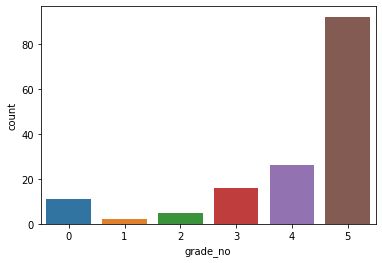

In [34]:
#grades from programming course
sns.countplot(x =prog_grades['grade_no'], data = prog_grades)

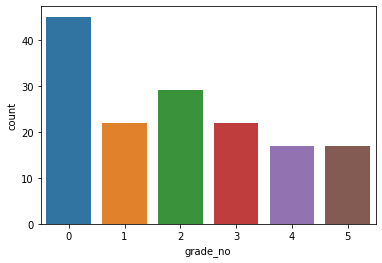

In [36]:
#grades from calculus course
sns.countplot(x =calc_grades['grade_no'], data = calc_grades)

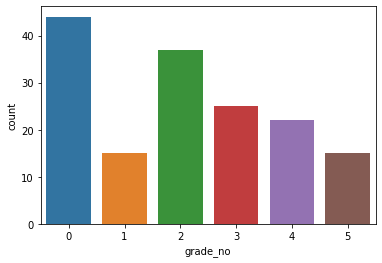

In [37]:
#grades from the transition to advanced maths course 
sns.countplot(x =disc_grades['grade_no'], data = disc_grades)

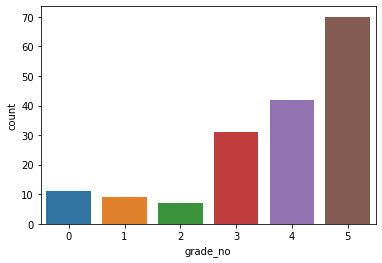

In [38]:
#grades from the intro to speciality course
sns.countplot(x =intro_grades['grade_no'], data = intro_grades)

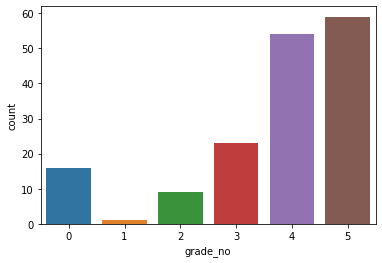

In [40]:
#grades from the architecture and hardware course
sns.countplot(x = arch_grades['grade_no'], data = arch_grades)

As we can see from the countplots some courses have more gerenous grading than others. Since we have the math exam results for most of the students it makes sense to view the study results for math courses or math courses and programming.

In [41]:
the_maths = ['Kõrgem matemaatika I','Matemaatiline maailmapilt']

In [42]:
math_grades = comp_fall_final[comp_fall_final['AINE NIMETUS'].isin(the_maths)]

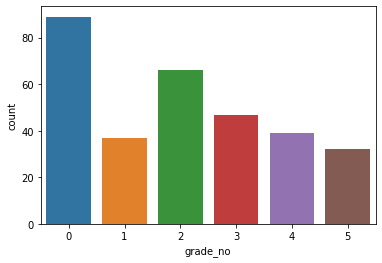

In [43]:
sns.countplot(x = math_grades['grade_no'], data = math_grades)

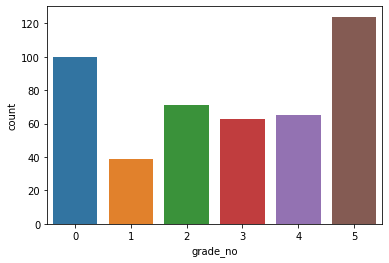

In [45]:
math_prog = ['Kõrgem matemaatika I','Matemaatiline maailmapilt', 'Programmeerimine']
math_prog_grades = comp_fall_final[comp_fall_final['AINE NIMETUS'].isin(math_prog)]
sns.countplot(x = math_prog_grades['grade_no'], data = math_prog_grades)

#The students


In [47]:
#setup once more
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [48]:
#the current study status
status = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/inf2020/data/SISdata.xlsx', sheet_name = 'Üldandmed')

In [49]:
status.columns

Index(['ISIKUKOOD', 'ÕPIB/EKSMATRIKULEERITUD SEISUGA 01.03.2022',
       'AKADEEMILISEL PUHKUSEL SEISUGA 01.03.2022', 'RIIGIEKSAM_MAT_KITSAS',
       'RIIGIEKSAM_MAT_LAI', 'RIIGIEKSAM_MAT_VANA'],
      dtype='object')

##The status
This data consists of six colums. 
1. The first is the national ID that we can use to merge the dataframe to other instruments used in this study and to get the age and gender of the students.  
2. 'ÕPIB/EKSMATRIKULEERITUD' is the column that takes these excact two values indicating if the student is currently studying or if they have been exmatriculated. This does not mean the students academic career is finished for ever. It just means the students status at the date of this query (1st of March 2022). No NA-s. 
3. 'AKADEEMILISEL PUHKUSEL' column will have the word 'jah' if the student was on academic leave at the moment of the query for this data. Otherwise the field is empty. Also empty if the student is exmatriculated.
4. Score of the math exam, narrow version (scale 25-96)
5. Score of the math exam, wide version (scale 6-100)
6. Score of the math exam, if it was taken before the innovation of wide and narrow exams (usually older students). (scale 59-98)

Note. If the student does not have any math exam score in their data the columns 4-6 will have a dash (-) in them. If the student has at least one math exam score then the other columns are empty.
A student can not have more than one math exam score.


todo:
- ~hinnete jaotus mat ainetele~
- ~hinnete jaotus proge ainele~
- ~hinnete jaotus ilma sis-infita (ja vb ilma riistvarata)~
- vanused ja sood
- merge kuuluvus ja enesetõhusus summa/faktorskoor